<a href="https://colab.research.google.com/github/ErnestoCash/Ind-4.0/blob/main/Ana%CC%81lisis_Sentimientos_AI_Clase_Viernes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Docente: Giovanny Martin.

Asignatura: AI.

Taller: Análisis de sentimientos

Introducción

Este documento tiene el objetivo de analizar **los sentimientos de clientes en un dataset de productos de una empresa**, en este análisis **se clasificó sentimientos positivos y negativos**, para resolver 2 preguntas: **1) ¿Por qué están felices o enojados los clientes?, 2)¿Cuáles son las razones de insatisfacción de los clientes?.** Para eso usaremos las librerías y paquetes de ayuda **pandas para B.D y sklearn análisis de sentimientos que ofrece la herramienta Python**.Después se hará posibles recomendaciones que permitan formular estrategias empresariales que ayuden a la empresa en su gestión de clientes.

Metodología:
1.  Se **identifica** las palabras que están en el campo review_comment_message_Eng.**Esto esta en el archivo excel**
2.  Después se procede a la clasificación de **percepciones positivas, neutrales o negativas por número de estrellas**. D*onde de 1 a 2 estrellas es una percepción negativa, 3 estrellas es neutra, más de 3 estrellas es una percepción positiva.*
3.  Se realiza la **distribución** de esta clasificación.
4.  Procedemos con un mapa **wordcloud para identificar las palabras más usadas** en este Dataset.
5.  Se **valora los sentimientos** positivos a aquellos que tienen entre 4 y 5 estrellas, sentimientos negativos entre 2 y 1 estrella. Se **ignoran las de 3 estrellas.** Ya que no es un elemento descriptivo sobre la percepción de calidad del producto.
6.Se generó un mapa **wordcloud**, para identificar cuáles son las palabras más frecuentes en **sentimiento positivos**, también se hizo lo mismo para **sentimientos negativos.**
7. Se identifica **las palabras con mayor frecuencia** para hacer el análisis mediante consulta de las palabras más usadas, con un análisis gráfico.



#PASO 1

**PASO 1**

A) INSTALAMOS LAS LIBRERIAS QUE NOS PERMITEN IDENTIFICAR SENTIMIENTOS

In [14]:

!pip install xlrd
#importamos  librerias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


# Para el clusteriong
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

#import time function from time module to track the training duration
from time import time

### visualización
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer


**PASO 1**

B) SE INSTALA LA SEGUNDA LIBRERIA DE NUBE DE PALABRAS

In [15]:
from wordcloud import WordCloud
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn as sns
import nltk
from collections import Counter
from nltk.util import ngrams
from nltk import bigrams
import itertools
import collections

nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


**PASO 2**

#Ponderación y análisis de sentimientos
1. En esta parte se va identificar la clase de distribuciòn configurada en el Dataset

In [31]:
#En esta parte se carga el archivo de excel y se analizan los datos suministrados
import pandas as pd
DFPLN = pd.read_excel('ArchivoADepurar.xlsx')
DFPLN.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
27995,es_0197719,product_es_0431178,reviewer_es_0788997,2,Els cortador pequeño bien. El cortador largo n...,Decepción,es,home_improvement
27996,es_0931068,product_es_0554071,reviewer_es_0836456,2,No me ha gustado mucho xq la calidad del tejid...,Libros,es,baby_product
27997,es_0376970,product_es_0571629,reviewer_es_0068552,2,Supuestamente yo había comprado una edición fí...,"Solo trae el código de descarga, no trae disco...",es,video_games
27998,es_0770800,product_es_0017553,reviewer_es_0179978,2,Demasiado pequeño y de calidad dudosa,Pequeño,es,furniture
27999,es_0670371,product_es_0362303,reviewer_es_0160533,2,"Realmente esperaba más por ese precio, hay otr...",Regular,es,beauty


#Paso 3

Identificación de sentimientos por estrellas

En esta parte en un histograma identicamos còmo està distribuido los sentimientos por estrellas. Se evidencia que la mayoría de clientes tiene una percepción positiva frente a los productos.


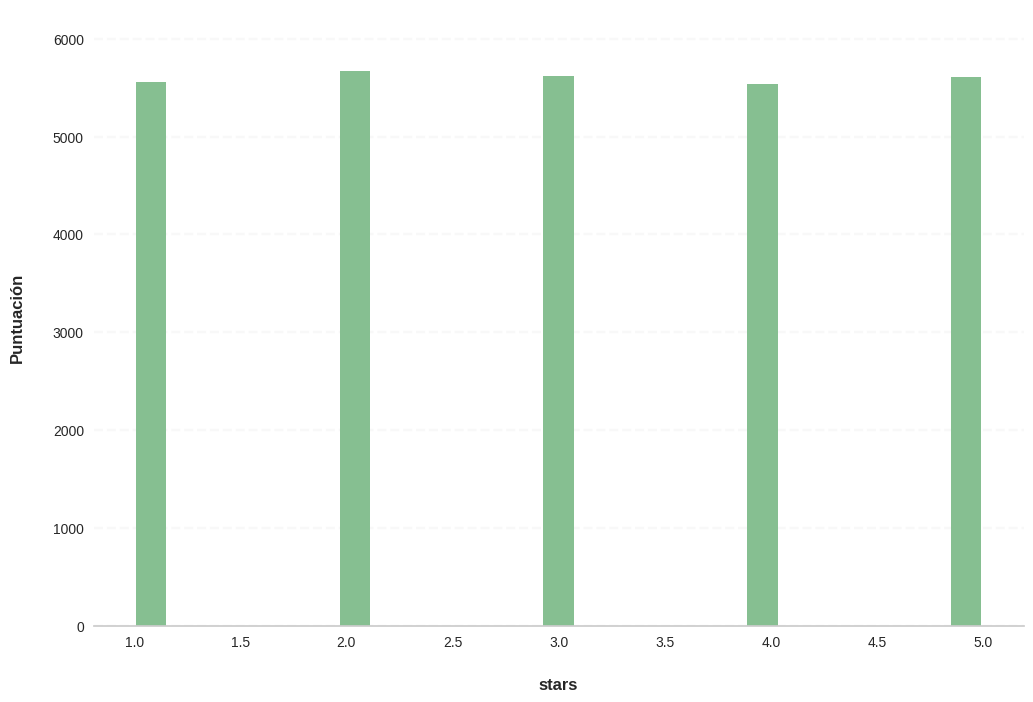

In [20]:
#De la data suministrada identificamos la columna score, la cual nos dice el
#Número de estrellas y nos los grafíca
ax = DFPLN.hist(column='stars', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("stars", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Puntuación", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


#PASO 4

En una tabla identificamos los reviews y su clasificaciòn segùn el nùmero de estrellas, en esta parte se logra identificar los comentarios. Para este caso se relacionan entre 1 y 2 estrellas como sentimiento negativo y 4 y 5 estrellas como sentimiento positivo. Los comentarios están en la columna Summary que es resumen en inglés

In [33]:
#Aqui se revisa el número de estrellas comparadas con los comentarios, esto sale de la columna
#Summary
pd.crosstab(DFPLN.review_body, DFPLN.stars)

stars,1,2,3,4,5
review_body,,,,,
"""No hace nada de ruido, buena relación calidad precio."" PD: después de 3 se más de uso há empezado un ruído muy molesto al pedalear, es un golpe con cada pedaleo y por eso le he bajado 2 estrellas, si hay alguna forma de quitar el ruido volveré a subir a 5 estrellas.",0,0,1,0,0
"""Son muy cómodos, se ajusta perfecto al oído y no hay peligro de que se caigan mientras corres o haces ejercicio. el sonido es muy bueno sin llegar a ser excelente, tienen buen volumen y aislamiento del ruido. En relación al precio son excelentes y muy recomendables. El material es de buen tacto y fácil de limpiar, no se han dañado con el sudor.""",0,0,0,0,1
"(9 años): Súper chulo. Me llegó al día siguiente perfecto, sin ningún rasguño ni página rota. Es muy entretenido y los olores olían mucho.",0,0,0,0,1
"* Puntos positivos _ Buena calidad de sonido _ Obciones de poder utilizarlo tanto en toma de corriente a través de usb o por pilas típicas modelo AA . _ variación de obciones como por ejemplo efectos de sonido , indicación en pantalla de la duración del disco , bloqueo de botones etc ..... _ diseño precioso _ No pesa casi nada y se hace cómodo _ Precio no está mal , no es un chollo pero tampoco es caro , un precio justo _ gran detalle de incluir bolsita para guardar el reproductor * Puntos Negativos _ Incluye un cable usb pero no el adaptador que se utiliza para enchufar el cable usb y poder conectarlo a la toma de corriente _ Cable usb demasiado corto ( no vale para nada ) y este es el punto negativo más fuerte en mi opinión _ auriculares no está nada mal pero podría estar mejor _ Al poner el volumen a tope se escucha alto y claro pero podría tener más potencia en volumen ( más alto ) _ suelo comprar muchas veces en Amazon y suelen ser muy rapidos en el envío pero esta vez han tardado más de lo habitual .",0,0,1,0,0
"+ Es muy bonito, queda muy bien en la mesa. - Salero y pimentero agujero muy pequeño tanto de salida como de entrada (para rellenarlo) - El tapón de la aceitera ha durado exactamente 24h. No cierra bien. + Me lo quedo por ya lo había usado, habita tira",0,1,0,0,0
...,...,...,...,...,...
Ã‰ste artículo lo devolví Informen por favor del proceso actual Gracias,1,0,0,0,0
Ã‰ste auriculares son de muy buen calidad de sonido y batería dura bastante. Primero que mi llegaron tenía problema de vincular con movil. Yo contacté con equipo de soporte y mi respondieron rápido y mí mandaron nuevo auriculares que funciona muy bien y yo quedado con lo otro también. Estoy muy satisfecho con la compra.,0,0,0,0,1
â€¦ Porque se le cae el pelo Le doy tres estrellas Lo demás es perfecto le envío la rapidez y la calidad en cuanto al pelo es brillante y se nota que es peluca solo para disfraz,0,0,1,0,0


# PASO 5

Ponemos en una variable llamada TipoSent si es menor que 3 lo ponemos como negativo, si es mayor que 3 lo ponemos como positivo.

In [34]:
DFPLN['TipoSent'] = DFPLN['stars'].apply(lambda rating: "Positivo" if rating > 3 else "Negativo" )
#Aqui solo se agrega la variable TipoSent para identificar el Tipo de Sentimiento
#Se divide y se asigna positivo y negativo, según el número de estrellas


# PASO 6

Aqui se distingue la clasificaciòn, cuantos comentarios son positivos y cuantos son negativos. Recordemos que separamos los sentimientos neutros que fueron calificados con 3

In [35]:
display(DFPLN.shape) #Number of rows (instances) and columns in the dataset
DFPLN["TipoSent"].value_counts()/DFPLN.shape[0] #Class distribution in the dataset

(28000, 9)

Negativo    0.602071
Positivo    0.397929
Name: TipoSent, dtype: float64

# PASO 6_A

Identificamos las palabras más usadas, es precisio despues depurar las palabras que no nos aportan valor, para esto tenemos que clasificar los sentimientos positivos de los negativos. En este caso importamos la librería nltk que es una herramienta de PLN para graficaa el word cloud o nube de palabras en español

In [36]:
#importamos la libreria nltk
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS


# Paso 7

Asignamos reseñas con stars > 3 como sentimiento positivo
Stars < 3 serán sentimientos negativos
eliminamos los con stars = 3. Esto es por que los clientes con sentimiento neutro no me aportan nada si el producto es bueno o malo

In [38]:
#asignamos reseñas con stars > 3 como sentimiento positivo
#Stars < 3 serán sentimientos negativos
#eliminamos los con stars = 3

DFPLN = DFPLN[DFPLN['review_body']!=3]
DFPLN['sentiment'] = DFPLN['stars'].apply(lambda rating: +1 if rating > 3 else -1)

**Aclaración**

Ya con el texto limpio asigno una variable sentiment para clasificar los sentimientos positivos y negativos. Los neutros no los tuve en cuenta ya que no aportan si el sentimiento es bueno o malo de la marca.

In [39]:
# partimos el DFPLN en positivo y negativo
positive = DFPLN[DFPLN['sentiment'] == 1]
negative = DFPLN[DFPLN['sentiment'] == -1]


# Paso 8

a) Con la nueva clasifiaciòn y limpieza agrego un wordcloud, para identicar cuales son las palabras màs frecuentes en sentimiento positivos, tambièn hago lo mismo para sentimientos negativos.

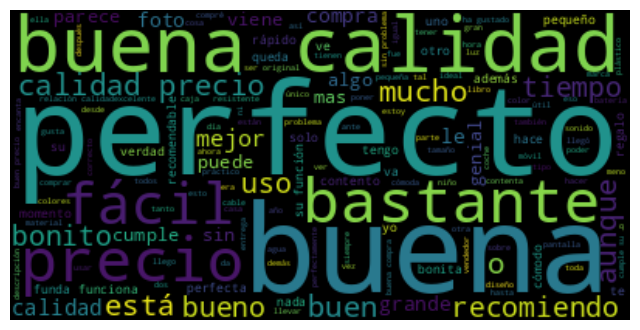

In [51]:
stopwords = set(open("stopWordsSPA.txt"))
stopwords = set(STOPWORDS)
g = open('stopWordsSPA.txt', 'r')
stopwords.update(["br", "href","el","muy","la","and","en","bien","undefined","de","y","pero","para","esta","que","lo","son","las","con","del","un","mi","hay","todo","ma","los","por","tiene","se","como","al","porque","si","e","producto","una","es","ya","cuando","esperaba","poco","más","este"])
stopwords.update(open("stopWordsSPA.txt"))

## good, great son removidos ya que fueron incluidos en los sentimientos negativos.

pos = " ".join(str(review) for review in positive.review_body)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

**Paso 8**

B) lo mismo para sentimientos negativos.

In [ ]:
neg = " ".join(str(review) for review in negative.Summary)
#g = open('stopWordsSPA.txt', 'r')
#stopwords.update(g)
stopwords.update(["br", "href","el","muy","la","and","en","bien","undefined"])
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

# Paso 9

En el anterior wordcloud se logró diferenciar las palabras màs usadas en sentimientos positivos y sentimientos negativos.Como se logra distinguir en el gràfico los sentimientos negativos estàn califiacdos con -1 y los positivos con +1

In [ ]:
DFPLN['sentimentt'] = DFPLN['sentiment'].replace({-1 : 'negative'})
DFPLN['sentimentt'] = DFPLN['sentimentt'].replace({1 : 'positive'})
ax = DFPLN.hist(column='sentiment', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(True)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(True)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#aaaaaa', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("sentimentt", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Puntuación", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    #x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


#Paso 10

Clasificación en una tabla de los sentimientos
Ahora miramos los porcentajes de sentimiento positivo y negativo

In [ ]:
# Ahora miramos los porcentajes de sentimiento positivo y negativo
display(DFPLN.shape) #Number of rows (instances) and columns in the dataset
DFPLN["sentimentt"].value_counts()/DFPLN.shape[0] #Class distribution in the dataset

In [ ]:
#Dataframe con los 5 grupos
pd.crosstab(DFPLN.sentimentt, DFPLN.Score)

In [ ]:
DFPLN["sentimentt"] = DFPLN["sentimentt"].astype('category')
DFPLN["sentimentt"].cat.codes

0        1
1        0
2        1
3        0
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Length: 50000, dtype: int8

In [ ]:
DFPLN.head()

In [ ]:
# @title TipoSent

from matplotlib import pyplot as plt
import seaborn as sns
DFPLN.groupby('TipoSent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
DFPLN ['Summary'] = DFPLN ['Summary']. astype ( str )

In [ ]:
DFPLN.dtypes

Unnamed: 0                   int64
Id                           int64
ProductId                   object
UserId                      object
ProfileName                 object
HelpfulnessNumerator         int64
HelpfulnessDenominator       int64
Score                        int64
Time                         int64
Summary                     object
Text                        object
TipoSent                    object
sentiment                    int64
sentimentt                category
dtype: object

# Paso 11

** Análisis de frecuencia de palabras en tabla**

Aqui se selecciona las palabras negativas, se le mide la frecuencia de estas palabras y se grafica

In [ ]:
!pip install sqldf
import pandas as pd
import numpy as np
import sqldf
import matplotlib.pyplot as plt
#Seleccionamos en una cadena los comentarios negativos
StrN = "".join(str(review) for review in negative.Summary)

f = StrN
g = open('stop_words_english.txt', 'r')
Stoprword = g.read()  # lee todo el archivo completo
Fragmento = f  # lee todo el archivo completo
w1 = [word for word in Fragmento.split(' ') if word not in Stoprword]

frecuenciaPalab = []
for w in w1:
    frecuenciaPalab.append(w1.count(w))
df = pd.DataFrame(w1)
dfe= df.set_axis(['Palabra'], axis=1)

query = """
SELECT
Palabra, count(Palabra)As totalVeces
FROM dfe
Group by Palabra
Order by totalVeces Desc

"""

t = sqldf.run(query)
dfe2 = pd.DataFrame(t)
dfe2


#Paso 12

Aqui hacemos el rankig de las palabras con comentarios negativos y Positivos

In [ ]:
ranking = dfe2.head(n=15)
ranking

Aqui graficamos el top de las 15 palabras, relacionadas con sentimientos
negativos, esto esta relacionado con el número de estrella de 1 a 2.

In [ ]:
import seaborn as sns
sns.barplot(x="totalVeces", y="Palabra", data=ranking, palette="Reds_d").set_title("Top 15 Palabras sentimiento negativo")

#sns.barplot("totalVeces", "Palabra", data=ranking, palette="Reds_d").set_title("Top 15 Palabras sentimiento negativo")

Aqui hacemos los comentarios positivos

In [ ]:
!pip install sqldf
import pandas as pd
import numpy as np
import sqldf
import matplotlib.pyplot as plt
#Seleccionamos en una cadena los comentarios positivos
StrP = "".join(str(review) for review in positive.Summary)

f = StrP
g = open('stop_words_english.txt', 'r')
Stoprword = g.read()  # lee todo el archivo completo
Fragmento = f  # lee todo el archivo completo
w1 = [word for word in Fragmento.split(' ') if word not in Stoprword]

frecuenciaPalab = []
for w in w1:
    frecuenciaPalab.append(w1.count(w))
df = pd.DataFrame(w1)
dfe= df.set_axis(['Palabra'], axis=1)

query = """
SELECT
Palabra, count(Palabra)As totalVeces
FROM dfe
Group by Palabra
Order by totalVeces Desc

"""

t = sqldf.run(query)
dfe3 = pd.DataFrame(t)
dfe3


In [ ]:
ranking1 = dfe3.head(n=15)
ranking1

In [ ]:
import seaborn as sns
sns.barplot(x="totalVeces", y="Palabra", data=ranking1, palette="Blues_d").set_title("Top 15 Palabras sentimiento positivo")

**Análisis de resultados**

 1. Se analizó la columna "review_comment_message_Eng" y se logró ponderar la clase de sentimiento y comentario que tenían los clientes. Esto se puede observar en el aparte **ponderación y análisis de sentimientos**.En esta sección, se logró identificar previamente que la mayoría de comentarios tienen un sesgo positivo.Para complentar esto, se hizó un análisis de comentarios y valoración por estrellas, además se hizó un análisis gráfico del número de estrellas, donde la mayoría de sentimientos son positivos. Ya que esta valoración obsila entre 4 y 5. El resultado se obtuvo de una base de 119.151 registros, donde los sentimientos se distribuyen:
Sentimiento Positivo    0.745575
Sentimiento Negativo    0.254425

 2. **Word Cloud**, en este aparte se uso esta herramienta para identificar cuales son las palabras más usadas, dentro las palabras más frecuentes es buen producto, entregado, recomendado, a tiempo, inconforme, no es lo que esperaba. Para poder diferenciar esto se clasificó en un primer wordcloud de sentimientos positivos donde las palabras más frecuentes son: Buen producto, lo amo, muy cumplidos. Tambien, se hizó otro wordcloud de sentimientos negativos, dónde las palabras más frecuentes son: Tuve que esperar por la compra, no llegó a tiempo, entre otras opiniones. La clasificación de wordcloud positivo y negativo se uso de acuerdo a los comentarios y número de estrellas de clasificación.

 3. **Análisis de frecuencia de palabras**, en esta sección se identificó las palabras más usadas para sentimientos positivos y sentimientos negativos. Para poder lograr se hizo lo siguiente: 1) se creó un archivo de stopwords, que elimina signos de puntuación, caracteres especiales y aquellas palabras que hacen ruido, que no aporta al análisis de sentimientos. 2) se eliminó aquellos sentimientos neutros, ya que no aportan mucho para el análisis. 3) Se hizo un algoritmo que cuenta las palabras más frecuentes para sentimientos negativos, las palabras identificadas que tienen mayor frecuencia son: Producto, recibido, compra, entrega. 4)
Se hizo un algoritmo que cuenta las palabra s más frecuentes para sentimientos positivos, las palabras que tienen mayor frecuencia son: Bueno, recomendado, rapido, súper. El análisis gráfico de esto se puede ver al final del script análisis de sentimientos.

**Conclusión**

1. Frente a la primera pregunta se puede concluir que la empresa por lo general es rápida en sus entregas, los productos en su generalidad son muy buenos y los clientes tienden a recomendar positivamente los productos. Despúes de haber eliminado los comentarios neutros, podemos concluir que el 80% de los clientes tiene una buena percepción frente a la empresa. De otro lado, respondiendo la segunda pregunta, los comentarios negativos se relacionan con algunos incumplimientos en las entregas y pocos productos defectuosos. Esto representa el 20% de sentimientos negativos. Para mayor detalle por favor dirigirse a la sección de clasificación positiva y negativa de sentimientos al final del script análisis de sentimientos.


**Recomendación.**

Frente a los análisis de sentimientos negativos, la empresa debe identificar por que algunos productos son defectuosos; profundizando en este análisis, la palabra entrega esta relacionada con comentarios como:  "no es lo que esperaba", se puede inferir que puede haber algunos problemas de logistica. Para esto se debe analizar cómo es el proceso de entrega e identicar las posibles causas.
